In [1]:
from cProfile import label

import pandas as pd

In [2]:
# Load the data from csv file
df = pd.read_csv('data/spotify_songs.csv')

In [3]:
df.head()

track_id                                         track_name  \
0  0017A6SJgTbfQVU2EtsPNo                                           Pangarap   
1  004s3t0ONYlzxII9PLgU6z                                       I Feel Alive   
2  00chLpzhgVjxs1zKC9UScL                                             Poison   
3  00cqd6ZsSkLZqGMlQCR0Zo  Baby It's Cold Outside (feat. Christina Aguilera)   
4  00emjlCv9azBN0fzuuyLqy                                         Dumb Litty   

      track_artist                                             lyrics  \
0  Barbie's Cradle  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1    Steady Rollin  The trees, are singing in the wind The sky blu...   
2   Bell Biv DeVoe  NA Yeah, Spyderman and Freeze in full effect U...   
3      CeeLo Green  I really can't stay Baby it's cold outside I'v...   
4             KARD  Get up out of my business You don't keep me fr...   

   track_popularity          track_album_id  \
0                41  1srJQ0njEQgd8w4XSqI4JQ   
1                28  3z04Lb9Dsilqw68SHt6jLB   
2                 0  6oZ6brjB8x3GoeSYdwJdPc   
3                41  3ssspRe42CXkhPxdc12xcp   
4                65  7h5X3xhh3peIK9Y0qI5hbK   

                       track_album_name track_album_release_date  \
0                                  Trip               2001-01-01   
1                           Love & Loss               2017-11-21   
2                                  Gold               2005-01-01   
3                  CeeLo's Magic Moment               2012-10-29   
4  KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   

                                       playlist_name             playlist_id  \
0                                 Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                  Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                                     Christmas Soul  6FZYc2BvF7tColxO8PBShV   
4                                  K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   

   ... loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...  -10.068    1       0.0236       0.27900           0.01170    0.0887   
1  ...   -4.739    1       0.0442       0.01170           0.00994    0.3470   
2  ...   -7.504    0       0.2160       0.00432           0.00723    0.4890   
3  ...   -5.819    0       0.0341       0.68900           0.00000    0.0664   
4  ...   -1.993    1       0.0409       0.03700           0.00000    0.1380   

   valence    tempo  duration_ms  language  
0    0.566   97.091       235440        tl  
1    0.404  135.225       373512        en  
2    0.650  111.904       262467        en  
3    0.405  118.593       243067        en  
4    0.240  130.018       193160        en  

[5 rows x 25 columns]

In [6]:
#Check if there is any genre that is country in column playlist_genre or playlist_subgenre look for names containing country

print(df['playlist_genre'].str.contains('folk').sum())
print(df['playlist_subgenre'].str.contains('folk').sum())

0
0


In [7]:
df['playlist_subgenre'].str.contains('hip hop').sum()

np.int64(2520)

In [4]:
df2 = pd.read_csv('data/spotify_songs_2.csv')


In [5]:
df2.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [6]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [7]:
# Get common columns from both dataframes
common_columns = df.columns.intersection(df2.columns)


In [8]:
common_columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [9]:
df = df[common_columns]
df2 = df2[common_columns]

In [10]:
# Combine those two dataframes
df = pd.concat([df, df2], ignore_index=True)

In [11]:
# Check for duplicates in pairs track name : track_artist
df.duplicated(subset=['track_name', 'track_artist']).sum()

np.int64(25057)

In [12]:
# Delete those duplicates
df.drop_duplicates(subset=['track_name', 'track_artist'], inplace=True)

In [13]:
# Convert duration_ms to duration (in seconds)
df['duration'] = df['duration_ms'] / 1000

In [67]:
df[df['playlist_genre'].isin(['rock', 'pop', 'rap'])]

track_id                           track_name  \
0      0017A6SJgTbfQVU2EtsPNo                             Pangarap   
1      004s3t0ONYlzxII9PLgU6z                         I Feel Alive   
4      00emjlCv9azBN0fzuuyLqy                           Dumb Litty   
11     00HIh9mVUQQAycsQiciWsh                            Limestone   
13     00i2HU7TEzzftShjRrDSEF                              Changes   
...                       ...                                  ...   
34548  0docub2BW5HcsWU4WoOQqA             Dude (Looks Like a Lady)   
34553  5O6JuXxnhwG3W5YClY2mEb  He's Back (The Man Behind The Mask)   
34574  1GfG7elw3IndXv932o0Phx      Motley Crue/Girls, Girls, Girls   
34632  3IRovqSVYx3CNtDWRebsET                Alive - 2006 Remaster   
34648  5tJjQIhH6mH3PhG1DjW3gD                            Southtown   

             track_artist  track_popularity          track_album_id  \
0         Barbie's Cradle                41  1srJQ0njEQgd8w4XSqI4JQ   
1           Steady Rollin                28  3z04Lb9Dsilqw68SHt6jLB   
4                    KARD                65  7h5X3xhh3peIK9Y0qI5hbK   
11     Magic City Hippies                58  7mtoEwzZYBqG8JYItxcccG   
13                   2Pac                72  4Y9ISbppFbwk0r1XCLUi0I   
...                   ...               ...                     ...   
34548           Aerosmith                 1  0YlgzYfI3a1OrGBBN0wWTG   
34553        Alice Cooper                48  4aeWG6lDY1FHkMdVLFW5gn   
34574     Various Artists                 1  1GlAcBLB4RlJtP8WngEgq1   
34632              P.O.D.                57  1i3YXOzNkaykTt6CxWGOOU   
34648              P.O.D.                51  3m4tEvOqwOSk3Yy5apKaFq   

                            track_album_name track_album_release_date  \
0                                       Trip               2001-01-01   
1                                Love & Loss               2017-11-21   
4       KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   
11                          Hippie Castle EP               2015-07-24   
13            The Best of 2Pac - Pt. 1: Thug               2007-01-01   
...                                      ...                      ...   
34548                The Essential Aerosmith               2011-09-13   
34553                            Constrictor               1986-01-01   
34574                    Girls, Girls, Girls                     1987   
34632     Greatest Hits [The Atlantic Years]               2006-10-27   
34648  The Fundamental Elements Of Southtown                     1999   

                                      playlist_name             playlist_id  \
0                                Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                 Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
4                                 K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   
11                                  Indie Poptimism  1pZWCY50kMUhshcESknir8   
13           90s Gangsta Rap / Top Hip-hop Classics  0C2zyPdlkbWHrwVg9gqNdU   
...                                             ...                     ...   
34548  Hard Rock Classics 1967-1991 (Party Edition)  1NIX36ZFWEtgXSbSNghoue   
34553  Hard Rock Classics 1967-1991 (Party Edition)  1NIX36ZFWEtgXSbSNghoue   
34574  Hard Rock Classics 1967-1991 (Party Edition)  1NIX36ZFWEtgXSbSNghoue   
34632                              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
34648                              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
0               rock  ...   2   -10.068     1       0.0236      0.279000   
1               rock  ...   9    -4.739     1       0.0442      0.011700   
4                pop  ...   9    -1.993     1       0.0409      0.037000   
11               pop  ...   4    -9.359     1       0.0383      0.282000   
13               rap  ...   7    -6.722     1       0.0760      0.040400   
...              ...  ...  ..       ...   ...

In [68]:
df['playlist_genre'].unique()

array(['rock', 'r&b', 'pop', 'edm', 'latin', 'rap'], dtype=object)

In [69]:
# Print unique values of playlist subgenre for every unique playlist genre
for genre in df['playlist_genre'].unique():
    print(genre)
    print(df[df['playlist_genre'] == genre]['playlist_subgenre'].unique())

rock
['classic rock' 'hard rock' 'album rock' 'permanent wave']
r&b
['new jack swing' 'neo soul' 'urban contemporary' 'hip pop']
pop
['dance pop' 'indie poptimism' 'post-teen pop' 'electropop']
edm
['big room' 'progressive electro house' 'pop edm' 'electro house']
latin
['latin pop' 'latin hip hop' 'tropical' 'reggaeton']
rap
['gangster rap' 'trap' 'southern hip hop' 'hip hop']


In [70]:
df['playlist_subgenre'].unique()

array(['classic rock', 'hard rock', 'new jack swing', 'neo soul',
       'dance pop', 'urban contemporary', 'big room', 'hip pop',
       'latin pop', 'indie poptimism', 'gangster rap', 'album rock',
       'post-teen pop', 'trap', 'latin hip hop', 'southern hip hop',
       'tropical', 'electropop', 'progressive electro house', 'pop edm',
       'reggaeton', 'hip hop', 'permanent wave', 'electro house'],
      dtype=object)

In [14]:
# Get year_released from track_album_release_date (date is either in format yyyy-mm-dd or yyyy)
df['year_released'] = df['track_album_release_date'].str.extract(r'(\d{4})')
df.year_released.astype('int').min()

np.int64(1957)

In [15]:
# Load from path /Users/julia.rozycka/Master/multi_modal_genre_classification/data/fma_full_echonest_lyrics.csv

# Combine tracks with echonest

# Load fma data
fma = pd.read_csv('data/fma/tracks.csv', header=[0, 1], skiprows=[2])
fma = fma.rename(columns={"Unnamed: 0_level_1": "track_id"}, level=1)
fma = fma.rename(columns={"Unnamed: 0_level_0": "track"}, level=0)

# Load echonest data
echonest = pd.read_csv('data/fma/echonest.csv', header=[0,1], skiprows=[1,3])

# Drop last 100 columns
echonest = echonest.iloc[:, :-224]
echonest = echonest.rename(columns={"Unnamed: 0_level_1": "track_id"}, level=1)
echonest = echonest.rename(columns={"Unnamed: 0_level_0": "track"}, level=0)

# Change track_id to int
fma[('track', 'track_id')] = fma[('track', 'track_id')].astype(int)
echonest[('track', 'track_id')] = echonest[('track', 'track_id')].astype(int)

In [18]:
# Merge fma and echonest
feg = pd.merge(echonest, fma, on=[('track', 'track_id')], how='inner')

genres = pd.read_csv('data/fma/genres.csv')

def get_genres(row):
    return ', '.join(genres[genres['genre_id'].isin(eval(row[('track', 'genres')]))]['title'])

def get_genres_all(row):
    return ', '.join(genres[genres['genre_id'].isin(eval(row[('track', 'genres_all')]))]['title'])

feg[('track', 'genres')] = feg.apply(get_genres, axis=1)
feg[('track', 'genres_all')] = feg.apply(get_genres_all, axis=1)

In [19]:
feg[('track', 'genre_top')].value_counts()

(track, genre_top)
Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Name: count, dtype: int64

In [55]:
feg[('track', 'genres')].str.split(', ').explode().value_counts()

(track, genres)
Electronic           3351
Rock                 2526
Pop                  1453
Folk                 1368
Hip-Hop              1351
                     ... 
Death-Metal             2
Western Swing           1
Country & Western       1
Musical Theater         1
Rock Opera              1
Name: count, Length: 122, dtype: int64

In [20]:
feg[('track', 'genres_all')].str.split(', ').explode().value_counts()

(track, genres_all)
Rock               5426
Electronic         3909
Punk               1663
Folk               1639
Pop                1554
                   ... 
British Folk          2
Death-Metal           2
Western Swing         1
Rock Opera            1
Musical Theater       1
Name: count, Length: 128, dtype: int64

In [21]:
fma_country = pd.DataFrame(columns=feg.columns)

In [22]:
# My desired 8 genres are rock, pop, rap, hip hop, indie, country, jazz, metal
# I have rock, pop, rap, hip hop, indie so I need country, jazz and metal from this dataset (country can be folk)

# First let's handle country -> look for rows containing Country in genres_all or genres
#feg[feg[('track', 'genres_all')].str.contains('Country', case=False) | feg[('track', 'genres')].str.contains('Country', case=False)]

# Let's add this to fma_country dataframe use concat
fma_country = pd.concat([fma_country, feg[feg[('track', 'genres_all')].str.contains('Country', case=False) | feg[('track', 'genres')].str.contains('Country', case=False)]], ignore_index=True)
fma_country

/var/folders/b9/g8km3d4d6bl780pwnb5dnhxjd5x2_h/T/ipykernel_65711/3470863772.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fma_country = pd.concat([fma_country, feg[feg[('track', 'genres_all')].str.contains('Country', case=False) | feg[('track', 'genres')].str.contains('Country', case=False)]], ignore_index=True)


track     echonest                                                    \
    track_id acousticness danceability    energy instrumentalness  liveness   
0       4375     0.970483     0.460177  0.331866         0.436476  0.098814   
1       4376     0.980211     0.391189  0.570070         0.891303  0.139343   
2       4377     0.965274     0.619251  0.123601         0.111180  0.087787   
3       4378     0.911693     0.534247  0.221037         0.597859  0.166894   
4       4379     0.952783     0.536903  0.164472         0.378644  0.109290   
..       ...          ...          ...       ...              ...       ...   
202   112283     0.757823     0.696276  0.586102         0.000643  0.078159   
203   112285     0.592521     0.495607  0.430956         0.000591  0.287033   
204   112286     0.464529     0.543746  0.558995         0.000015  0.210067   
205   112287     0.717641     0.436372  0.421558         0.124235  0.157409   
206   112288     0.783033     0.464564  0.494372         0.011487  0.093054   

                                               ...       track           \
    speechiness    tempo   valence album_date  ... information interest   
0      0.034394  127.673  0.214984        NaN  ...         NaN     4526   
1      0.039944  145.586  0.269211        NaN  ...         NaN     3285   
2      0.059609   75.889  0.289852        NaN  ...         NaN     2685   
3      0.028097  144.557  0.810237        NaN  ...         NaN     2151   
4      0.036604  136.245  0.372458        NaN  ...         NaN     2229   
..          ...      ...       ...        ...  ...         ...      ...   
202    0.049765  124.519  0.888618        NaN  ...         NaN     5741   
203    0.041467  119.937  0.735875        NaN  ...         NaN     5523   
204    0.078529  126.617  0.840517        NaN  ...         NaN     7303   
205    0.070784   90.856  0.553380        NaN  ...         NaN     4379   
206    0.112864   73.185  0.850808        NaN  ...         NaN    11580   

                                                                              \
    language_code                                            license listens   
0              en                                        Attribution    1753   
1              en                                        Attribution    9699   
2              en                                        Attribution     908   
3              en                                        Attribution     799   
4              en                                        Attribution     802   
..            ...                                                ...     ...   
202           NaN  Attribution-Noncommercial-Share Alike 3.0 Unit...    4038   
203           NaN  Attribution-Noncommercial-Share Alike 3.0 Unit...    3395   
204           NaN  Attribution-Noncommercial-Share Alike 3.0 Unit...    5504   
205           NaN  Attribution-Noncommercial-Share Alike 3.0 Unit...    3379   
206           NaN  Attribution-Noncommercial-Share Alike 3.0 Unit...    3759   

                                                                  
    lyricist number publisher tags                         title  
0        NaN      1       NaN   []                 Monkey Tongue  
1        NaN      2       NaN   []                       Detroit  
2        NaN      3       NaN   []                    Little Man  
3        NaN      4       NaN   []       Elizabeth Cotten's Song  
4        NaN      5       NaN   []               Hopelessly Lost  
..       ...    ...       ...  ...                           ...  
202      NaN      0       NaN   []         08 I Found a New Baby  
203      NaN      0       NaN   []             10 Mana Mou Ellas  
204      NaN      0       NaN   []                  11 Sweet Sue  
205      NaN      0       NaN   []         12 June Lake Freilach  
206      NaN      0       NaN   []  13 Hora Din Clejani Cigansko  

[207 rows x 78 columns]

In [23]:
# Let's see if there is genre very similar to Country like: Folk in genres
fma_country = pd.concat([fma_country, feg[feg[('track', 'genres')].str.contains('Folk', case=False)]], ignore_index=True)

In [24]:
fma_country.drop_duplicates(subset=[('artist', 'name'),('track', 'title')], inplace=True)

In [25]:
# Add new column track echonest genre to fma_country
fma_country[('echonest', 'genre')] = 'Country'

In [26]:
fma_country

track     echonest                                                    \
     track_id acousticness danceability    energy instrumentalness  liveness   
0        4375     0.970483     0.460177  0.331866         0.436476  0.098814   
1        4376     0.980211     0.391189  0.570070         0.891303  0.139343   
2        4377     0.965274     0.619251  0.123601         0.111180  0.087787   
3        4378     0.911693     0.534247  0.221037         0.597859  0.166894   
4        4379     0.952783     0.536903  0.164472         0.378644  0.109290   
...       ...          ...          ...       ...              ...       ...   
1839   124138     0.000248     0.536910  0.643270         0.002684  0.666352   
1840   124139     0.005016     0.339160  0.606036         0.001531  0.109231   
1841   124140     0.129015     0.968645  0.449092         0.005345  0.067864   
1842   124141     0.010671     0.347581  0.883422         0.599232  0.341174   
1843   124142     0.000026     0.508667  0.860589         0.009079  0.352894   

                                                ...    track                \
     speechiness    tempo   valence album_date  ... interest language_code   
0       0.034394  127.673  0.214984        NaN  ...     4526            en   
1       0.039944  145.586  0.269211        NaN  ...     3285            en   
2       0.059609   75.889  0.289852        NaN  ...     2685            en   
3       0.028097  144.557  0.810237        NaN  ...     2151            en   
4       0.036604  136.245  0.372458        NaN  ...     2229            en   
...          ...      ...       ...        ...  ...      ...           ...   
1839    0.033235  124.698  0.572598        NaN  ...     1929           NaN   
1840    0.033636  172.792  0.344699        NaN  ...     3174           NaN   
1841    0.077108  122.964  0.922195        NaN  ...     3387           NaN   
1842    0.037460  134.254  0.730198        NaN  ...    13864           NaN   
1843    0.046416  153.735  0.912485        NaN  ...     9189           NaN   

                                                                          \
                                                license listens lyricist   
0                                           Attribution    1753      NaN   
1                                           Attribution    9699      NaN   
2                                           Attribution     908      NaN   
3                                           Attribution     799      NaN   
4                                           Attribution     802      NaN   
...                                                 ...     ...      ...   
1839  Creative Commons Attribution-NonCommercial-NoD...    1661      NaN   
1840  Creative Commons Attribution-NonCommercial-NoD...    2851      NaN   
1841  Creative Commons Attribution-NonCommercial-NoD...    3074      NaN   
1842  Creative Commons Attribution-NonCommercial-NoD...    6179      NaN   
1843  Creative Commons Attribution-NonCommercial-NoD...    8432      NaN   

                                                                     echonest  
     number publisher tags                                     title    genre  
0         1       NaN   []                             Monkey Tongue  Country  
1         2       NaN   []                                   Detroit  Country  
2         3       NaN   []                                Little Man  Country  
3         4       NaN   []                   Elizabeth Cotten's Song  Country  
4         5       NaN   []                           Hopelessly Lost  Country  
...     ...       ...  ...                                       ...      ...  
1839      2       NaN   []  Sometimes I Feel Like Fletcher Christian  Country  
1840      3       NaN   []                                   Orpheus  Country  
1841      4       NaN   []                      Now We Have The Bomb  Country  
1842      5       NaN   []                                Last Dance  Country  
184

In [27]:
# Exclude fma_country from feg by track_id
feg = feg[~feg[('track', 'track_id')].isin(fma_country[('track', 'track_id')])]
feg.count()

track     track_id            11394
echonest  acousticness        11394
          danceability        11394
          energy              11394
          instrumentalness    11394
                              ...  
track     lyricist               33
          number              11394
          publisher             141
          tags                11394
          title               11393
Length: 78, dtype: int64

In [28]:
# Now let's add jazz
fma_jazz = pd.DataFrame(columns=feg.columns)
fma_jazz = pd.concat([fma_jazz, feg[feg[('track', 'genre_top')] == 'Jazz']], ignore_index=True)
fma_jazz.track.track_id.count()

/var/folders/b9/g8km3d4d6bl780pwnb5dnhxjd5x2_h/T/ipykernel_65711/2091742740.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fma_jazz = pd.concat([fma_jazz, feg[feg[('track', 'genre_top')] == 'Jazz']], ignore_index=True)


np.int64(241)

In [29]:
# Now check in genres and add
fma_jazz = pd.concat([fma_jazz, feg[feg[('track', 'genres_all')].str.contains('Jazz', case=False) | feg[('track', 'genres')].str.contains('Jazz', case=False)]], ignore_index=True)
fma_jazz.track.track_id.count()

np.int64(837)

In [30]:
fma_jazz.drop_duplicates(subset=[('artist', 'name'),('track', 'title')], inplace=True)

In [31]:
fma_jazz.track.track_id.count()

np.int64(587)

In [32]:
fma_jazz[('echonest', 'genre')] = 'Jazz'

In [33]:
# Exclude fma_jazz from feg by track_id
feg = feg[~feg[('track', 'track_id')].isin(fma_jazz[('track', 'track_id')])]

In [34]:
feg.track.track_id.count()

np.int64(10807)

In [35]:
# Now let's add metal
fma_metal = pd.DataFrame(columns=feg.columns)
fma_metal = pd.concat([fma_metal, feg[feg[('track', 'genre_top')] == 'Metal']], ignore_index=True)
fma_metal.track.track_id.count()

np.int64(0)

In [36]:
# Now check in genres and add
fma_metal = pd.concat([fma_metal, feg[feg[('track', 'genres_all')].str.contains('Metal', case=False) | feg[('track', 'genres')].str.contains('Metal', case=False)]], ignore_index=True)
fma_metal.track.track_id.count()

/var/folders/b9/g8km3d4d6bl780pwnb5dnhxjd5x2_h/T/ipykernel_65711/3551379556.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fma_metal = pd.concat([fma_metal, feg[feg[('track', 'genres_all')].str.contains('Metal', case=False) | feg[('track', 'genres')].str.contains('Metal', case=False)]], ignore_index=True)


np.int64(252)

In [37]:
fma_metal.drop_duplicates(subset=[('artist', 'name'),('track', 'title')], inplace=True)

In [38]:
fma_metal[('echonest', 'genre')] = 'Metal'

In [39]:
fma_metal.track.track_id.count()

np.int64(250)

In [40]:
# Concat fma_country, fma_jazz, fma_metal
fma_cjm = pd.concat([fma_country, fma_jazz, fma_metal], ignore_index=True)

fma_cjm.drop_duplicates(subset=[('artist', 'name'),('track', 'title')], inplace=True)

In [41]:
# Take columns from fma_cjm that have 1st header level 'echonest' and second: ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre'] + ('track' , 'duration') 

fma_cjm_echonest = fma_cjm[[('echonest', 'danceability'), ('echonest', 'energy'), ('echonest', 'speechiness'), ('echonest', 'acousticness'), ('echonest', 'instrumentalness'), ('echonest', 'liveness'), ('echonest', 'valence'), ('echonest', 'tempo'), ('echonest', 'genre'), ('track', 'duration'), ('album', 'date_released')]]

In [43]:
# Drop 1st level of columns
fma_cjm_echonest.columns = fma_cjm_echonest.columns.droplevel(0)
fma_cjm_echonest['year_released'] = fma_cjm_echonest['date_released'].str.extract(r'(\d{4})')
# When NaN insert median year_released by the genre

# Ensure all values in 'year_released' are numeric
fma_cjm_echonest['year_released'] = pd.to_numeric(fma_cjm_echonest['year_released'], errors='coerce')

# Fill NaN values with the median year_released by genre
fma_cjm_echonest['year_released'] = fma_cjm_echonest['year_released'].fillna(fma_cjm_echonest.groupby('genre')['year_released'].transform('median'))

#fma_cjm_echonest.year_released.astype(int).min()

/var/folders/b9/g8km3d4d6bl780pwnb5dnhxjd5x2_h/T/ipykernel_65711/2664392397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fma_cjm_echonest['year_released'] = fma_cjm_echonest['date_released'].str.extract(r'(\d{4})')
/var/folders/b9/g8km3d4d6bl780pwnb5dnhxjd5x2_h/T/ipykernel_65711/2664392397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fma_cjm_echonest['year_released'] = pd.to_numeric(fma_cjm_echonest['year_released'], errors='coerce')
/var/folders/b9/g8km3d4d6bl780pwnb5dnhxjd5x2_h/T/ipykernel_6

In [44]:
fma_cjm_echonest['year_released'] = fma_cjm_echonest['year_released'].astype(int)

/var/folders/b9/g8km3d4d6bl780pwnb5dnhxjd5x2_h/T/ipykernel_65711/1145777018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fma_cjm_echonest['year_released'] = fma_cjm_echonest['year_released'].astype(int)


In [45]:
fma_cjm_echonest

danceability    energy  speechiness  acousticness  instrumentalness  \
0         0.460177  0.331866     0.034394      0.970483          0.436476   
1         0.391189  0.570070     0.039944      0.980211          0.891303   
2         0.619251  0.123601     0.059609      0.965274          0.111180   
3         0.534247  0.221037     0.028097      0.911693          0.597859   
4         0.536903  0.164472     0.036604      0.952783          0.378644   
...            ...       ...          ...           ...               ...   
2567      0.445251  0.995814     0.072464      0.000088          0.742341   
2568      0.403126  0.502009     0.034991      0.844417          0.025837   
2569      0.638672  0.955109     0.072761      0.022261          0.802745   
2570      0.670471  0.968672     0.052916      0.032193          0.781511   
2571      0.269402  0.864542     0.100601      0.005324          0.343687   

      liveness   valence    tempo    genre duration        date_released  \
0     0.098814  0.214984  127.673  Country      305  2008-03-25 00:00:00   
1     0.139343  0.269211  145.586  Country      235  2008-03-25 00:00:00   
2     0.087787  0.289852   75.889  Country      240  2008-03-25 00:00:00   
3     0.166894  0.810237  144.557  Country      186  2008-03-25 00:00:00   
4     0.109290  0.372458  136.245  Country      241  2008-03-25 00:00:00   
...        ...       ...      ...      ...      ...                  ...   
2567  0.333421  0.314636  109.966    Metal      126  2014-11-22 00:00:00   
2568  0.161054  0.182832   95.016    Metal      273  2014-11-22 00:00:00   
2569  0.352897  0.143388  124.996    Metal      230  2013-08-01 00:00:00   
2570  0.212983  0.319052   95.066    Metal      215  2013-08-01 00:00:00   
2571  0.262544  0.597184   83.747    Metal      222  2013-08-01 00:00:00   

      year_released  
0              2008  
1              2008  
2              2008  
3              2008  
4              2008  
...             ...  
2567           2014  
2568           2014  
2569           2013  
2570           2013  
2571           2013  

[2570 rows x 12 columns]

In [46]:
# Get common columns from both dataframes
common_columns = df.columns.intersection(fma_cjm_echonest.columns)
common_columns

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration',
       'year_released', 'genre'],
      dtype='object')

In [47]:
df = df[common_columns]
fma_cjm_echonest = fma_cjm_echonest[common_columns]
# Combine those two dataframes
df = pd.concat([df, fma_cjm_echonest], ignore_index=True)

In [16]:
# Create new column called genre. rock -> when playlist_genre is rock, pop -> when playlist_genre is pop but not indie poptimism, hiphop -> when playlist_subgenre is hip hop or southern hip hop, rap -> when playlist_genre is rap but subgenre is not hip hop, indie when playlist_genre is pop and playlist_subgenre is indie poptimism.

df['genre'] = 'other'
df.loc[df['playlist_genre'] == 'rock', 'genre'] = 'rock'
df.loc[(df['playlist_genre'] == 'pop') &(df['playlist_subgenre'] != 'indie poptimism'), 'genre'] = 'pop'
df.loc[(df['playlist_subgenre'] == 'hip hop') | (df['playlist_subgenre'] == 'southern hip hop'), 'genre'] = 'hip hop'
df.loc[(df['playlist_genre'] == 'rap') & (df['playlist_subgenre'] != 'hip hop'), 'genre'] = 'rap'
df.loc[(df['playlist_genre'] == 'pop') & (df['playlist_subgenre'] == 'indie poptimism'), 'genre'] = 'indie'

In [17]:
# Remove rows when genre is other
df = df[df['genre'] != 'other']

# Remove columns playlist_genre and playlist_subgenre
df.drop(columns=['playlist_genre', 'playlist_subgenre'], inplace=True)

In [48]:
# Change genre names to Uppercase and Hip hop to Hip-Hop
df['genre'] = df['genre'].str.title()
df['genre'] = df['genre'].str.replace('Hip Hop', 'Hip-Hop')

In [49]:
df['genre'].value_counts()

genre
Rap        3878
Rock       3782
Pop        3202
Country    1735
Indie      1478
Hip-Hop    1252
Jazz        585
Metal       250
Name: count, dtype: int64

In [50]:
# Fatures are danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms

# Compare hip hop and hip pop subgenres using PCA

features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration', 'year_released']

# See how well the features separate hip hop and hip pop in the space

In [51]:
df

danceability    energy  speechiness  acousticness  instrumentalness  \
0          0.682000  0.401000     0.023600      0.279000          0.011700   
1          0.303000  0.880000     0.044200      0.011700          0.009940   
2          0.760000  0.887000     0.040900      0.037000          0.000000   
3          0.706000  0.457000     0.038300      0.282000          0.008490   
4          0.865000  0.657000     0.076000      0.040400          0.000000   
...             ...       ...          ...           ...               ...   
16157      0.445251  0.995814     0.072464      0.000088          0.742341   
16158      0.403126  0.502009     0.034991      0.844417          0.025837   
16159      0.638672  0.955109     0.072761      0.022261          0.802745   
16160      0.670471  0.968672     0.052916      0.032193          0.781511   
16161      0.269402  0.864542     0.100601      0.005324          0.343687   

       liveness   valence    tempo duration year_released  genre  
0      0.088700  0.566000   97.091   235.44          2001   Rock  
1      0.347000  0.404000  135.225  373.512          2017   Rock  
2      0.138000  0.240000  130.018   193.16          2019    Pop  
3      0.061400  0.723000   78.014  209.165          2015  Indie  
4      0.140000  0.316000  111.115   268.96          2007    Rap  
...         ...       ...      ...      ...           ...    ...  
16157  0.333421  0.314636  109.966      126          2014  Metal  
16158  0.161054  0.182832   95.016      273          2014  Metal  
16159  0.352897  0.143388  124.996      230          2013  Metal  
16160  0.212983  0.319052   95.066      215          2013  Metal  
16161  0.262544  0.597184   83.747      222          2013  Metal  

[16162 rows x 11 columns]

In [52]:
# SMOTE upsample the data for Jazz and Metal genres to 1000 samples
from imblearn.over_sampling import SMOTE

X = df[features]
y = df['genre']

smote = SMOTE(sampling_strategy={'Jazz': 1000, 'Metal': 1000}, random_state=42)
X, y = smote.fit_resample(X, y)

df = pd.DataFrame(X, columns=features)
df['genre'] = y

df['genre'].value_counts()

genre
Rap        3878
Rock       3782
Pop        3202
Country    1735
Indie      1478
Hip-Hop    1252
Jazz       1000
Metal      1000
Name: count, dtype: int64

In [160]:
# Select KBest features to separate hip hop and hip pop
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=8)

X = df[features]
y = df['genre']

X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'duration', 'year_released'],
      dtype='object')

In [161]:
# Normalize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[selected_features] = scaler.fit_transform(df[selected_features])

In [162]:
df[selected_features]

danceability    energy  speechiness  acousticness  instrumentalness  \
0          0.457526 -1.054140    -0.749549      0.062064         -0.475483   
1         -1.736523  1.049076    -0.568351     -0.796548         -0.481027   
2          0.909071  1.079811    -0.597378     -0.715281         -0.512336   
3          0.596463 -0.808252    -0.620248      0.071701         -0.485594   
4          1.516921  0.069917    -0.288638     -0.704359         -0.512336   
...             ...       ...          ...           ...               ...   
16157     -0.913027  1.557597    -0.319741     -0.833850          1.825939   
16158     -1.156889 -0.610624    -0.649356      1.878280         -0.430954   
16159      0.206696  1.378866    -0.317129     -0.762625          2.016204   
16160      0.390782  1.438422    -0.491685     -0.730722          1.949319   
16161     -1.931024  0.981202    -0.072244     -0.817029          0.570233   

        valence  duration  year_released  
0      0.332725  0.042885      -0.734185  
1     -0.347699  1.436247       0.637110  
2     -1.036524 -0.383786       0.808522  
3      0.992149 -0.222271       0.465698  
4     -0.717313  0.381154      -0.219950  
...         ...       ...            ...  
16157 -0.723044 -1.061536       0.379992  
16158 -1.276639  0.421924       0.379992  
16159 -1.442311 -0.012013       0.294286  
16160 -0.704493 -0.163387       0.294286  
16161  0.463703 -0.092746       0.294286  

[16162 rows x 8 columns]

In [163]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df[selected_features])
X = pca.transform(df[selected_features])


In [164]:
# Plot the data in 3d plot with plotly
import plotly.express as px

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=df['genre'])
fig.show()



In [154]:
# Check genres distribution
df['genre'].value_counts()

genre
Rap        3878
Rock       3782
Pop        3202
Country    1735
Indie      1478
Hip-Hop    1252
Jazz        585
Metal       250
Name: count, dtype: int64

In [156]:
# Build a model to predict genre based on metadata (features)

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna

X = df[features]
y = df['genre']

# Train the model \using k-fold cross validation (k=10). Try to optimize the model using optuna. Use random forest classifier. Calculate accuracy for each fold. Calculate mean accuracy for all folds. Optimize with Optuna.

def objective(trial):
    # Do stratified k-fold cross validation and take mean accuracy as the objective
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Get the parameters
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 10, 100)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, max_leaf_nodes=max_leaf_nodes, random_state=42)

    accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        accuracies.append(accuracy_score(y_val, y_pred))

    return sum(accuracies) / len(accuracies)


study = optuna.create_study(direction='maximize', study_name='random_forest_metadata_8genres', storage='sqlite:///random_forest_metadata.db', load_if_exists=True)
study.optimize(objective, n_trials=50)


[I 2025-01-19 13:19:07,753] Using an existing study with name 'random_forest_metadata_8genres' instead of creating a new one.
[I 2025-01-19 13:19:11,164] Trial 2 finished with value: 0.5397834808991103 and parameters: {'n_estimators': 56, 'max_depth': 3, 'min_samples_split': 8, 'max_leaf_nodes': 35}. Best is trial 0 with value: 0.6225715556249503.
[I 2025-01-19 13:19:12,784] Trial 3 finished with value: 0.6058651655981925 and parameters: {'n_estimators': 14, 'max_depth': 6, 'min_samples_split': 7, 'max_leaf_nodes': 69}. Best is trial 0 with value: 0.6225715556249503.
[I 2025-01-19 13:19:17,206] Trial 4 finished with value: 0.6369261543501288 and parameters: {'n_estimators': 30, 'max_depth': 11, 'min_samples_split': 8, 'max_leaf_nodes': 92}. Best is trial 4 with value: 0.6369261543501288.
[I 2025-01-19 13:19:23,145] Trial 5 finished with value: 0.6377304949882744 and parameters: {'n_estimators': 40, 'max_depth': 14, 'min_samples_split': 5, 'max_leaf_nodes': 90}. Best is trial 5 with val

In [169]:
# Check the model on test set
# Train the model using the best parameters
best_params = study.best_params
model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], max_leaf_nodes=best_params['max_leaf_nodes'], random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)
# Save model
import joblib

joblib.dump(model, 'models/random_forest_metadata_8_genres.joblib')

['models/random_forest_metadata_8_genres.joblib']

In [170]:
# Load the model
model = joblib.load('models/random_forest_metadata_8_genres.joblib')
# Evaluate on test set
y_pred = model.predict(X_test)
# Calculate metrics for inbalanced dataset like f1 score, precision, recall, auc
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=df['genre'].unique()))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

        Rock       0.66      0.80      0.73        87
         Pop       0.69      0.29      0.40        63
       Indie       0.31      0.05      0.09        74
         Rap       1.00      0.13      0.24        30
     Hip-Hop       0.33      0.08      0.13        12
     Country       0.47      0.51      0.49       160
        Jazz       0.58      0.76      0.66       194
       Metal       0.67      0.81      0.73       189

    accuracy                           0.59       809
   macro avg       0.59      0.43      0.43       809
weighted avg       0.58      0.59      0.55       809



0.5920889987639061

In [177]:
# Check feature importance
importances = model.feature_importances_

importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df.sort_values(by='importance', ascending=False)

ValueError: All arrays must be of the same length

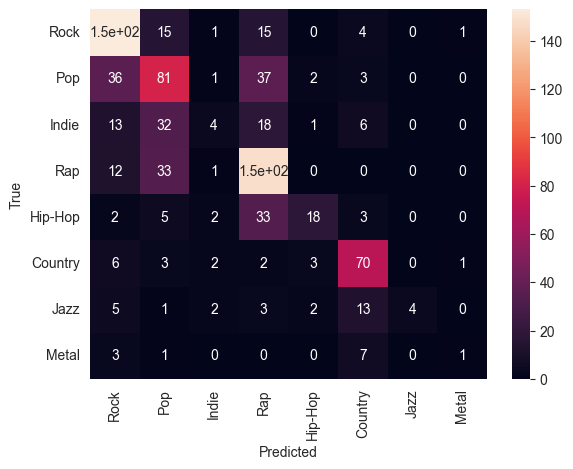

In [176]:
# Plot confusion matrix with target names
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=df['genre'].unique())
sns.heatmap(cm, annot=True, xticklabels=df['genre'].unique(), yticklabels=df['genre'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

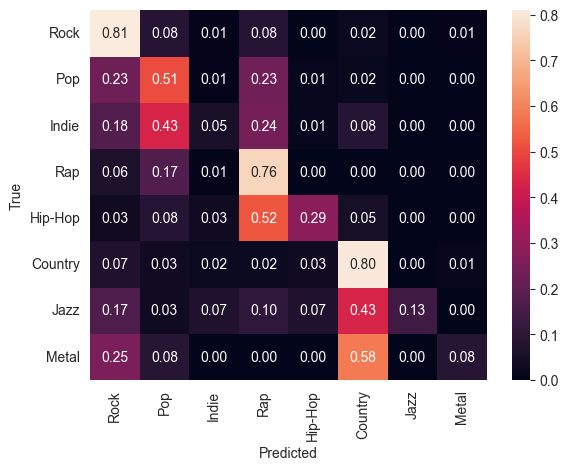

In [179]:
# Normalized confusion matrix
import numpy as np

cm = cm / cm.sum(axis=1)[:, np.newaxis]
# Round annotated values to 2 decimal places
sns.heatmap(cm, annot=True, xticklabels=df['genre'].unique(), yticklabels=df['genre'].unique(), fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [178]:
# Genre
genre_dict = {
'hip hop': 0, 'indie': 1, 'pop': 2, 'rap': 3, 'rock': 4}


In [180]:
# Print normalized confusion matrix with genre names
# TODO: something is off with the names
genre_names = y_test.unique()
cm = pd.DataFrame(cm, columns=genre_names, index=genre_names)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [53]:
# Now train the model with XGBClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

def objective(trial):
    # Do stratified k-fold cross validation and take mean accuracy as the objective
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Get the parameters
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
    gamma = trial.suggest_float('gamma', 0.01, 1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    
    
    
    scaler = StandardScaler()
    
    df[features] = scaler.fit_transform(df[features])
    
    X = df[features]

    y = df['genre']

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    # Compute weights for classes with compute_sample_weight
    sample_weight = compute_sample_weight('balanced', y)

    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, gamma=gamma, min_child_weight=min_child_weight, random_state=42)
    
    accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model.fit(X_train, y_train, sample_weight=sample_weight[train_index])

        y_pred = model.predict(X_val)

        accuracies.append(accuracy_score(y_val, y_pred))

    return sum(accuracies) / len(accuracies)



In [56]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna
from sklearn.preprocessing import StandardScaler

study = optuna.create_study(direction='maximize', study_name='xgb_metadata_v1_8_genres_smote_normalized', storage='sqlite:///random_forest_metadata.db', load_if_exists=True)
study.optimize(objective, n_trials=50)

[I 2025-01-21 16:27:34,997] Using an existing study with name 'xgb_metadata_v1_8_genres_smote_normalized' instead of creating a new one.
[I 2025-01-21 16:27:39,298] Trial 1 finished with value: 0.6670514892942194 and parameters: {'n_estimators': 56, 'max_depth': 7, 'learning_rate': 0.43638440301403275, 'gamma': 0.7164853283609206, 'min_child_weight': 6}. Best is trial 1 with value: 0.6670514892942194.
[I 2025-01-21 16:27:43,636] Trial 2 finished with value: 0.6334616778764082 and parameters: {'n_estimators': 57, 'max_depth': 4, 'learning_rate': 0.11489046992907251, 'gamma': 0.8719611261236921, 'min_child_weight': 2}. Best is trial 1 with value: 0.6670514892942194.
[I 2025-01-21 16:27:50,705] Trial 3 finished with value: 0.6688406279942802 and parameters: {'n_estimators': 64, 'max_depth': 6, 'learning_rate': 0.16219721917171495, 'gamma': 0.5089337359094102, 'min_child_weight': 4}. Best is trial 3 with value: 0.6688406279942802.
[I 2025-01-21 16:27:55,324] Trial 4 finished with value: 0.

In [58]:
df

danceability    energy  speechiness  acousticness  instrumentalness  \
0          0.521131 -1.025206    -0.743682      0.026142         -0.548355   
1         -1.589368  1.046195    -0.560214     -0.819888         -0.553492   
2          0.955482  1.076466    -0.589604     -0.739811         -0.582507   
3          0.654777 -0.783038    -0.612761      0.035638         -0.557725   
4          1.540184  0.081848    -0.276996     -0.729050         -0.582507   
...             ...       ...          ...           ...               ...   
17322     -0.872527  0.118715    -0.465923     -0.050163          0.471672   
17323     -2.492602  1.141689    -0.320769     -0.855520          2.107410   
17324     -1.514438  0.483747    -0.618378     -0.606626          0.429812   
17325     -0.140278 -1.096789    -0.473052      0.190135          2.083150   
17326     -0.907344 -1.558326     5.649947      1.559207         -0.031421   

       liveness   valence     tempo  duration  year_released  genre  
0     -0.656886  0.381900 -0.803972 -0.008972      -0.757196   Rock  
1      1.066817 -0.293693  0.461516  1.184492       0.660691   Rock  
2     -0.327895 -0.977626  0.288720 -0.374431       0.837927    Pop  
3     -0.839066  1.036641 -1.437048 -0.236087       0.483455  Indie  
4     -0.314548 -0.660682 -0.338581  0.280768      -0.225489    Rap  
...         ...       ...       ...       ...            ...    ...  
17322 -0.470406 -1.198471 -0.162109  2.209505      -0.267110  Metal  
17323  0.207485 -1.395328  0.829758  0.940971      -0.101314  Metal  
17324 -0.325289 -1.433318 -0.702047  2.702419      -0.238467  Metal  
17325 -0.551003 -1.852579 -1.076526  0.700560      -0.209956  Metal  
17326 -0.412687 -0.070650  1.669000  6.189020       0.021697  Metal  

[17327 rows x 11 columns]

In [62]:
X = df[features]

In [63]:
X

danceability    energy  speechiness  acousticness  instrumentalness  \
0          0.521131 -1.025206    -0.743682      0.026142         -0.548355   
1         -1.589368  1.046195    -0.560214     -0.819888         -0.553492   
2          0.955482  1.076466    -0.589604     -0.739811         -0.582507   
3          0.654777 -0.783038    -0.612761      0.035638         -0.557725   
4          1.540184  0.081848    -0.276996     -0.729050         -0.582507   
...             ...       ...          ...           ...               ...   
17322     -0.872527  0.118715    -0.465923     -0.050163          0.471672   
17323     -2.492602  1.141689    -0.320769     -0.855520          2.107410   
17324     -1.514438  0.483747    -0.618378     -0.606626          0.429812   
17325     -0.140278 -1.096789    -0.473052      0.190135          2.083150   
17326     -0.907344 -1.558326     5.649947      1.559207         -0.031421   

       liveness   valence     tempo  duration  year_released  
0     -0.656886  0.381900 -0.803972 -0.008972      -0.757196  
1      1.066817 -0.293693  0.461516  1.184492       0.660691  
2     -0.327895 -0.977626  0.288720 -0.374431       0.837927  
3     -0.839066  1.036641 -1.437048 -0.236087       0.483455  
4     -0.314548 -0.660682 -0.338581  0.280768      -0.225489  
...         ...       ...       ...       ...            ...  
17322 -0.470406 -1.198471 -0.162109  2.209505      -0.267110  
17323  0.207485 -1.395328  0.829758  0.940971      -0.101314  
17324 -0.325289 -1.433318 -0.702047  2.702419      -0.238467  
17325 -0.551003 -1.852579 -1.076526  0.700560      -0.209956  
17326 -0.412687 -0.070650  1.669000  6.189020       0.021697  

[17327 rows x 10 columns]

In [60]:
y

array([7, 7, 5, ..., 4, 4, 4], shape=(17327,))

In [64]:
# Train the model using the best parameters
best_params = study.best_params
model = XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], gamma=best_params['gamma'], min_child_weight=best_params['min_child_weight'], random_state=42)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)



0.6793540945790081

In [216]:
print(list(label_encoder.classes_))
print(list(label_encoder.inverse_transform([0,1,2,3, 4,5,6,7])))

['Country', 'Hip-Hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'Rap', 'Rock']
['Country', 'Hip-Hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'Rap', 'Rock']


In [66]:
# Save model
import joblib
joblib.dump(model, 'models/xgb_metadata_v1_8_genres_smote_normalized.joblib')

['models/xgb_metadata_v1_8_genres_smote_normalized.joblib']

In [218]:
# Load the model
model = joblib.load('models/xgb_metadata_v1_8_genres_smote.joblib')
# Evaluate on test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=list(label_encoder.inverse_transform([0,1,2,3, 4,5,6,7]))))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

     Country       0.77      0.78      0.78        92
     Hip-Hop       0.69      0.47      0.56        73
       Indie       0.50      0.40      0.44        73
        Jazz       0.60      0.50      0.55        42
       Metal       0.92      0.96      0.94        49
         Pop       0.56      0.57      0.57       157
         Rap       0.65      0.77      0.70       202
        Rock       0.80      0.83      0.81       179

    accuracy                           0.69       867
   macro avg       0.69      0.66      0.67       867
weighted avg       0.68      0.69      0.68       867



0.6862745098039216

In [219]:
# Use latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

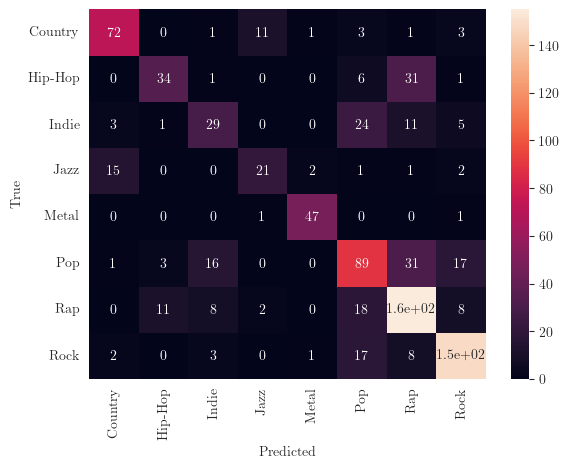

In [220]:
# Plot confusion matrix with genre names
genre_names = list(label_encoder.inverse_transform([0,1,2,3, 4,5,6,7]))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=genre_names, yticklabels=genre_names)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()


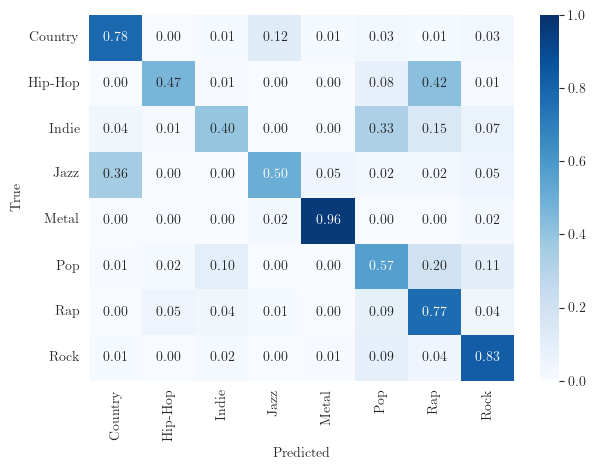

In [221]:
# Normalize confusion matrix with genre names
cm = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, xticklabels=genre_names, yticklabels=genre_names, fmt='.2f', cmap='Blues', vmax=1.0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_metadata_xgb_8_genres_smote.png', dpi=300)
plt.show()


In [131]:
# PCA for hip hop and indie

df_pop = df[df['genre'] == 'hip hop']
df_indie = df[df['genre'] == 'indie']

combined_hiphop_indie = pd.concat([df_pop, df_indie], ignore_index=True)

X = combined_hiphop_indie[features]
y = combined_hiphop_indie['genre']

# Perform PCA
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# Plot the data in 2d plot with plotly
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=combined_hiphop_indie['genre'])
fig.show()



In [135]:
# PCA for hip hop and indie

df_pop = df[df['genre'] == 'pop']
df_rock = df[df['genre'] == 'rock']

combined_pop_rock = pd.concat([df_pop, df_rock], ignore_index=True)

X = combined_pop_rock[features]
y = combined_pop_rock['genre']

# Perform PCA
pca = PCA(n_components=12)
pca.fit(X)
X = pca.transform(X)

# Plot the data in 2d plot with plotly
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=combined_pop_rock['genre'])
fig.show()


In [136]:
# Print classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=genre_names))

              precision    recall  f1-score   support

     hip hop       0.75      0.25      0.38        72
         pop       0.43      0.19      0.27        77
        rock       0.49      0.56      0.52       151
       indie       0.66      0.79      0.72       183
         rap       0.70      0.81      0.75       197

    accuracy                           0.62       680
   macro avg       0.61      0.52      0.53       680
weighted avg       0.62      0.62      0.60       680



In [145]:
y_pred

array([3, 2, 4, 4, 0, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 1, 4, 4, 2, 4, 2,
       4, 4, 4, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 1, 1, 4, 4, 3, 4, 4, 2, 4,
       3, 0, 3, 1, 2, 4, 2, 1, 4, 2, 4, 4, 1, 4, 3, 2, 3, 3, 3, 4, 3, 2,
       3, 3, 3, 3, 2, 3, 4, 3, 3, 0, 0, 3, 3, 2, 3, 4, 3, 3, 3, 2, 3, 3,
       2, 3, 4, 4, 3, 3, 4, 2, 3, 4, 4, 2, 4, 1, 4, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 4, 0, 3, 3, 4, 4, 4, 3, 3, 4, 2, 4, 3, 3, 3, 2, 2, 2, 1, 3,
       1, 2, 2, 4, 3, 3, 4, 2, 3, 0, 1, 4, 4, 3, 2, 2, 4, 0, 2, 4, 1, 4,
       3, 2, 2, 4, 4, 3, 4, 4, 2, 3, 3, 3, 4, 1, 3, 2, 3, 3, 4, 3, 2, 3,
       3, 3, 4, 4, 1, 4, 2, 4, 2, 3, 3, 4, 2, 4, 4, 3, 4, 3, 4, 3, 0, 2,
       4, 4, 2, 2, 2, 3, 3, 3, 2, 2, 0, 3, 2, 0, 3, 4, 2, 4, 2, 4, 2, 2,
       3, 0, 3, 4, 4, 4, 1, 3, 1, 3, 4, 2, 4, 2, 3, 4, 3, 2, 4, 4, 2, 4,
       2, 3, 3, 4, 4, 0, 4, 2, 3, 2, 2, 2, 2, 2, 3, 2, 4, 4, 4, 2, 3, 3,
       4, 3, 3, 3, 1, 3, 2, 4, 3, 3, 3, 4, 2, 3, 2, 2, 4, 3, 3, 4, 2, 1,
       4, 3, 1, 4, 2, 4, 3, 3, 3, 2, 2, 2, 2, 3, 4,

In [146]:
y_test

array([0, 2, 4, 4, 1, 3, 0, 3, 3, 4, 4, 4, 4, 3, 3, 3, 2, 4, 4, 2, 4, 2,
       4, 4, 4, 3, 3, 0, 3, 1, 2, 3, 3, 2, 3, 4, 2, 4, 4, 3, 4, 4, 2, 4,
       0, 0, 3, 1, 2, 4, 4, 4, 2, 4, 1, 2, 1, 4, 0, 2, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 0, 3, 3, 2, 3, 2, 1, 2, 0, 2, 3, 0,
       0, 3, 2, 4, 3, 1, 4, 2, 0, 4, 2, 2, 4, 0, 4, 0, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 0, 2, 3, 4, 2, 4, 0, 0, 4, 2, 4, 3, 3, 3, 2, 3, 2, 4, 0,
       1, 2, 4, 2, 3, 3, 4, 3, 3, 0, 1, 2, 4, 3, 2, 1, 4, 0, 2, 3, 1, 2,
       3, 1, 2, 1, 1, 2, 4, 2, 4, 0, 3, 3, 4, 4, 3, 2, 3, 3, 4, 3, 2, 0,
       3, 3, 4, 4, 1, 3, 2, 2, 3, 0, 3, 4, 2, 4, 4, 3, 2, 1, 4, 3, 0, 1,
       4, 2, 0, 2, 2, 3, 0, 3, 4, 2, 3, 3, 1, 1, 4, 2, 2, 4, 2, 1, 4, 2,
       3, 0, 0, 4, 4, 2, 1, 0, 4, 3, 4, 2, 4, 1, 3, 4, 3, 0, 4, 2, 1, 4,
       1, 3, 2, 4, 4, 0, 1, 2, 1, 0, 2, 1, 2, 2, 3, 3, 4, 4, 4, 1, 0, 2,
       2, 3, 0, 3, 3, 3, 2, 4, 1, 0, 3, 3, 3, 3, 2, 2, 4, 2, 0, 4, 4, 3,
       4, 1, 2, 4, 3, 4, 3, 4, 4, 4, 2, 1, 2, 3, 2,

In [147]:
# What label is what genre
for i, genre in enumerate(genre_names):
    print(f'{i}: {genre}')


0: hip hop
1: pop
2: rock
3: indie
4: rap


In [150]:
# Compare y_test and y_pred and check where hip hop (0) is predicted as indie (3)

for i in range(len(y_test)):
    if y_test[i] == 0 and y_pred[i] == 3:
        print(f'y_test: {y_test[i]}, y_pred: {y_pred[i]}')
        print(f'index: {i}')
        print(f'features: {X_test.iloc[i]}')
        print(f'genre: {genre_names[y_test[i]]}')
        print(f'predicted genre: {genre_names[y_pred[i]]}')
        print('---')



y_test: 0, y_pred: 3
index: 0
features: danceability        -0.431061
energy              -0.085565
key                 11.000000
loudness            -6.503000
mode                 1.000000
speechiness         -0.686475
acousticness         0.481000
instrumentalness     1.614906
liveness             0.103000
valence              0.046100
tempo               89.005000
duration_ms         -1.277857
Name: 24045, dtype: float64
genre: hip hop
predicted genre: indie
---
y_test: 0, y_pred: 3
index: 6
features: danceability         0.150536
energy              -0.685845
key                 11.000000
loudness           -10.657000
mode                 1.000000
speechiness          3.637409
acousticness         0.322000
instrumentalness    -0.350048
liveness             0.200000
valence              0.609000
tempo               85.370000
duration_ms         -1.150888
Name: 24219, dtype: float64
genre: hip hop
predicted genre: indie
---
y_test: 0, y_pred: 3
index: 27
features: danceability       

In [151]:
df

track_id                           track_name  \
0      0017A6SJgTbfQVU2EtsPNo                             Pangarap   
1      004s3t0ONYlzxII9PLgU6z                         I Feel Alive   
4      00emjlCv9azBN0fzuuyLqy                           Dumb Litty   
11     00HIh9mVUQQAycsQiciWsh                            Limestone   
13     00i2HU7TEzzftShjRrDSEF                              Changes   
...                       ...                                  ...   
34548  0docub2BW5HcsWU4WoOQqA             Dude (Looks Like a Lady)   
34553  5O6JuXxnhwG3W5YClY2mEb  He's Back (The Man Behind The Mask)   
34574  1GfG7elw3IndXv932o0Phx      Motley Crue/Girls, Girls, Girls   
34632  3IRovqSVYx3CNtDWRebsET                Alive - 2006 Remaster   
34648  5tJjQIhH6mH3PhG1DjW3gD                            Southtown   

             track_artist  track_popularity          track_album_id  \
0         Barbie's Cradle                41  1srJQ0njEQgd8w4XSqI4JQ   
1           Steady Rollin                28  3z04Lb9Dsilqw68SHt6jLB   
4                    KARD                65  7h5X3xhh3peIK9Y0qI5hbK   
11     Magic City Hippies                58  7mtoEwzZYBqG8JYItxcccG   
13                   2Pac                72  4Y9ISbppFbwk0r1XCLUi0I   
...                   ...               ...                     ...   
34548           Aerosmith                 1  0YlgzYfI3a1OrGBBN0wWTG   
34553        Alice Cooper                48  4aeWG6lDY1FHkMdVLFW5gn   
34574     Various Artists                 1  1GlAcBLB4RlJtP8WngEgq1   
34632              P.O.D.                57  1i3YXOzNkaykTt6CxWGOOU   
34648              P.O.D.                51  3m4tEvOqwOSk3Yy5apKaFq   

                            track_album_name track_album_release_date  \
0                                       Trip               2001-01-01   
1                                Love & Loss               2017-11-21   
4       KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   
11                          Hippie Castle EP               2015-07-24   
13            The Best of 2Pac - Pt. 1: Thug               2007-01-01   
...                                      ...                      ...   
34548                The Essential Aerosmith               2011-09-13   
34553                            Constrictor               1986-01-01   
34574                    Girls, Girls, Girls                     1987   
34632     Greatest Hits [The Atlantic Years]               2006-10-27   
34648  The Fundamental Elements Of Southtown                     1999   

                                      playlist_name             playlist_id  \
0                                Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                 Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
4                                 K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   
11                                  Indie Poptimism  1pZWCY50kMUhshcESknir8   
13           90s Gangsta Rap / Top Hip-hop Classics  0C2zyPdlkbWHrwVg9gqNdU   
...                                             ...                     ...   
34548  Hard Rock Classics 1967-1991 (Party Edition)  1NIX36ZFWEtgXSbSNghoue   
34553  Hard Rock Classics 1967-1991 (Party Edition)  1NIX36ZFWEtgXSbSNghoue   
34574  Hard Rock Classics 1967-1991 (Party Edition)  1NIX36ZFWEtgXSbSNghoue   
34632                              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   
34648                              2000's hard rock  0EmGNFBBgqLmvdQGPbgiMp   

       danceability  ...  loudness  mode  speechiness  acousticness  \
0          0.316706  ...   -10.068     1    -0.810568      0.279000   
1         -2.105550  ...    -4.739     1    -0.629269      0.011700   
4          0.815218  ...    -1.993     1    -0.658312      0.037000   
11         0.470095  ...    -9.359     1    -0.681194      0.282000   
13         1.486292  ...    -6.722     1    -0.349400      0.040400   
...             ...  ...       ...   ...          ...           ...   
3454

In [153]:
# Add y pred and y test to X_test
X_test['y_test'] = y_test
X_test['y_pred'] = y_pred



In [171]:
X_test

danceability    energy  key  loudness  mode  speechiness  acousticness  \
24045     -0.431061 -0.085565   11    -6.503     1    -0.686475      0.481000   
4870       0.463703  0.433595    9    -5.526     0    -0.643351      0.112000   
10914     -0.456626  1.077138    8    -5.277     1    -0.626629      0.000043   
16116      0.431748 -2.108128    2   -15.579     1    -0.445330      0.339000   
11513     -0.392714 -2.064865    4   -17.542     0    -0.681194      0.689000   
...             ...       ...  ...       ...   ...          ...           ...   
18177     -0.137067  1.390798    4    -5.357     1    -0.685595      0.009570   
5711      -0.290456 -0.664213    0    -7.017     0    -0.553581      0.084300   
11328     -0.680317 -0.777779    9   -11.673     1    -0.771844      0.650000   
33466     -2.246156  1.558443   10    -3.730     0    -0.462052      0.000041   
4192       1.492683 -0.842674    0    -7.512     0    -0.179543      0.125000   

       instrumentalness  liveness  valence    tempo  duration_ms  y_test  \
24045          1.614906     0.103   0.0461   89.005    -1.277857       0   
4870          -0.350048     0.105   0.5900  107.939    -0.171608       2   
10914         -0.327415     0.293   0.1510  127.043     0.168777       4   
16116         -0.344366     0.195   0.6140   84.796     1.268948       4   
11513          4.034403     0.128   0.4470  129.227    -0.338237       1   
...                 ...       ...      ...      ...          ...     ...   
18177         -0.014822     0.360   0.7630  125.398     0.847975       4   
5711          -0.350048     0.145   0.1550  113.025     0.318016       2   
11328         -0.347150     0.106   0.7330  134.053    -1.218644       4   
33466         -0.335417     0.205   0.4160   83.645    -0.014247       4   
4192          -0.340625     0.085   0.3250   88.993    -0.902573       0   

       y_pred  
24045       3  
4870        2  
10914       4  
16116       4  
11513       0  
...       ...  
18177       4  
5711        2  
11328       4  
33466       4  
4192        3  

[680 rows x 14 columns]

In [172]:
# Get subset of df where rows are in X_test without ordering by index
is_in_X = df.index.isin(X_test.index)

In [173]:
# Get the rows from df where index is in X_test without ordering by index
df_test = df[is_in_X]

In [174]:
df_test

track_id  \
21     00p85inzGeXRXgqDVn7Ftq   
70     029QP3fFtLaW9B9RKr8DAg   
181    05JdgtCKkZ5CoOjM5KS4EG   
199    05UpUTOoVV6PVjfIhjretZ   
208    064SVQsmWl5EF0zahmzkQk   
...                       ...   
34258  44Qviq32xko7hyCFdzVvWF   
34286  2TNd4eAOe1zu28mClWcXz8   
34287  7IHZxpSS1FbVBIY8GKinlK   
34288  0VnVmLWdJt46gLpnIXsh0g   
34632  3IRovqSVYx3CNtDWRebsET   

                                              track_name  \
21                                                  Laps   
70                                           Say My Name   
181    Camelot (feat. Yo Gotti, BlocBoy JB & Moneybag...   
199                                        Conte a Todos   
208                                   Let Your Love Flow   
...                                                  ...   
34258                                Fugados del Blister   
34286                         You're Never Gonna Like Me   
34287                      Suicide (Gonna Make Its Call)   
34288                                       Bloodstained   
34632                              Alive - 2006 Remaster   

               track_artist  track_popularity          track_album_id  \
21                  Zotiyac                36  3JPejWmP5LweCgQ2xHgYjV   
70               Lil Yachty                54  6upTR3RFKR7K20OnHRXDkL   
181              NLE Choppa                77  58gXxUxvp38hNEXjplbw4m   
199                   Sango                41  5Olya3n1lRhRU7NxNihquQ   
208    The Bellamy Brothers                68  77EM0wkGevYQcBo1AJt7B0   
...                     ...               ...                     ...   
34258  Cashetano la Merluza                29  53M4ouFLmJbFxF13D00C6D   
34286            Bad Apples                17  6scJxxcXBmA3wMVlL1pCqC   
34287            Bad Apples                23  6scJxxcXBmA3wMVlL1pCqC   
34288         Abram Mahoney                33  3rsAtEgVOYP6WhA8XUmxRl   
34632                P.O.D.                57  1i3YXOzNkaykTt6CxWGOOU   

                                        track_album_name  \
21                                                  Laps   
70                                      Teenage Emotions   
181    Camelot (feat. Yo Gotti, BlocBoy JB & Moneybag...   
199                                     De Mim, Pra Você   
208                                     Bellamy Brothers   
...                                                  ...   
34258                                         Tecnoporno   
34286                                         Bad Apples   
34287                                         Bad Apples   
34288                                       Bloodstained   
34632                 Greatest Hits [The Atlantic Years]   

      track_album_release_date                       playlist_name  \
21                  2018-11-16  Rap Party 24/7 Radio / Gangsta Rap   
70                  2017-05-26                  Hip Hop Controller   
181                 2019-12-06                           RapCaviar   
199                 2017-03-15                           POPTIMISM   
208                 1976-07-01                     Soft Rock Drive   
...                        ...                                 ...   
34258               2019-09-19                     HARD ROCK Vibes   
34286               2019-09-14                     HARD ROCK Vibes   
34287               2019-09-14                     HARD ROCK Vibes   
34288               2019-02-09                     HARD ROCK Vibes   
34632               2006-10-27                    2000's hard rock   

                  playlist_id  danceability  ...  loudness  mode  speechiness  \
21     4sGnz2x5tbHE2YlW1nemfb      0.789654  ...    -9.965     1     1.780418   
70     37i9dQZF1DWT5MrZnPU1zD      1.058083  ...    -6.296     0     2.044445   
181    37i9dQZF1DX0XUsuxWHRQd      1.006954  ...    -1.983     1     2.290870   
199    6lWMi4lPiiPwDqn8ZpeyAY      1.511857  ...    -5.412     0     1.639604   
208    37i9dQZF1DX6TIU4D13lOY      0.297533  ...   -14.687 

In [175]:
# Combine X_test and df_test
df_test = pd.concat([X_test, df_test], axis=1)

In [176]:
df_test

danceability    energy  key  loudness  mode  speechiness  acousticness  \
24045     -0.431061 -0.085565   11    -6.503     1    -0.686475      0.481000   
4870       0.463703  0.433595    9    -5.526     0    -0.643351      0.112000   
10914     -0.456626  1.077138    8    -5.277     1    -0.626629      0.000043   
16116      0.431748 -2.108128    2   -15.579     1    -0.445330      0.339000   
11513     -0.392714 -2.064865    4   -17.542     0    -0.681194      0.689000   
...             ...       ...  ...       ...   ...          ...           ...   
18177     -0.137067  1.390798    4    -5.357     1    -0.685595      0.009570   
5711      -0.290456 -0.664213    0    -7.017     0    -0.553581      0.084300   
11328     -0.680317 -0.777779    9   -11.673     1    -0.771844      0.650000   
33466     -2.246156  1.558443   10    -3.730     0    -0.462052      0.000041   
4192       1.492683 -0.842674    0    -7.512     0    -0.179543      0.125000   

      instrumentalness liveness valence  ...  loudness  mode  speechiness  \
24045         1.614906    0.103  0.0461  ...    -6.503     1    -0.686475   
4870         -0.350048    0.105  0.5900  ...    -5.526     0    -0.643351   
10914        -0.327415    0.293  0.1510  ...    -5.277     1    -0.626629   
16116        -0.344366    0.195  0.6140  ...   -15.579     1    -0.445330   
11513         4.034403    0.128  0.4470  ...   -17.542     0    -0.681194   
...                ...      ...     ...  ...       ...   ...          ...   
18177        -0.014822    0.360  0.7630  ...    -5.357     1    -0.685595   
5711         -0.350048    0.145  0.1550  ...    -7.017     0    -0.553581   
11328        -0.347150    0.106  0.7330  ...   -11.673     1    -0.771844   
33466        -0.335417    0.205  0.4160  ...    -3.730     0    -0.462052   
4192         -0.340625    0.085  0.3250  ...    -7.512     0    -0.179543   

       acousticness instrumentalness liveness valence    tempo duration_ms  \
24045      0.481000         1.614906    0.103  0.0461   89.005   -1.277857   
4870       0.112000        -0.350048    0.105  0.5900  107.939   -0.171608   
10914      0.000043        -0.327415    0.293  0.1510  127.043    0.168777   
16116      0.339000        -0.344366    0.195  0.6140   84.796    1.268948   
11513      0.689000         4.034403    0.128  0.4470  129.227   -0.338237   
...             ...              ...      ...     ...      ...         ...   
18177      0.009570        -0.014822    0.360  0.7630  125.398    0.847975   
5711       0.084300        -0.350048    0.145  0.1550  113.025    0.318016   
11328      0.650000        -0.347150    0.106  0.7330  134.053   -1.218644   
33466      0.000041        -0.335417    0.205  0.4160   83.645   -0.014247   
4192       0.125000        -0.340625    0.085  0.3250   88.993   -0.902573   

         genre  
24045  hip hop  
4870       pop  
10914     rock  
16116     rock  
11513    indie  
...        ...  
18177     rock  
5711       pop  
11328     rock  
33466     rock  
4192   hip hop  

[680 rows x 36 columns]

In [177]:
# Print unique genres and unique y_test values for the genre
for genre in genre_names:
    print(f'Genre: {genre}')
    print(f'Unique y_test values: {df_test[df_test["genre"] == genre]["y_test"].unique()}')
    print('---')

Genre: hip hop
Unique y_test values: [0]
---
Genre: pop
Unique y_test values: [2]
---
Genre: rock
Unique y_test values: [4]
---
Genre: indie
Unique y_test values: [1]
---
Genre: rap
Unique y_test values: [3]
---


In [ ]:
def funkcja(text):
    inputs = text
    with torch.no_grad():
        outputs = 'OUTPUTS'
    features = outputs
    return features